In [3]:
import json
from pprint import pprint

In [6]:
with open("successful_csvs_strawberry.json") as f:
    data = json.load(f)

In [7]:
for key in data:
    for item in data[key]:
        print(key, item, len(data[key][item]))


openrouter/anthropic/claude-3.7-sonnet strawberry.py.TestStrawberry 5
openrouter/meta-llama/llama-3.1-8b-instruct strawberry.py.TestStrawberry 3


In [8]:
import pandas as pd
from io import StringIO
import numpy as np

In [9]:
# generate groundtruth palindrome data
words = np.loadtxt("wordlist.10000.txt", dtype=str)
# get 1000 random words with the seed 42
np.random.seed(42)
words = np.random.choice(words, size=1000, replace=False)
letters = [np.random.choice(list(word)) for word in words]
counts = [word.count(letter) for letter, word in zip(letters, words)]
questions = [
    f"How many times does the letter '{letter}' appear in the word '{word}'?"
    for letter, word in zip(letters, words)
]
answers = [f"{count}" for count in counts]
df = pd.DataFrame({"question": questions, "answer": answers})
df.to_csv("gt_dummy_data.csv", index=False)
df.head()

,question,answer
0,How many times does the letter 'a' appear in t...,1
1,How many times does the letter 'n' appear in t...,1
2,How many times does the letter 'n' appear in t...,1
3,How many times does the letter 'a' appear in t...,1
4,How many times does the letter 't' appear in t...,1


In [10]:
df = pd.read_csv(
    StringIO(
        data["openrouter/meta-llama/llama-3.1-8b-instruct"][
            "strawberry.py.TestStrawberry"
        ][-1]
    )
)
df.head()

,question,answer
0,How many times does the letter 'a' appear in t...,3
1,How many times does the letter 'b' appear in t...,1
2,How many times does the letter 'n' appear in t...,2
3,How many times does the letter 'a' appear in t...,4
4,How many times does the letter 'b' appear in t...,1


In [11]:
def replace_dummy_data(csv_txt: str, path="../lm_eval/tasks/dummy_task/dummy_data.csv"):
    with open(path, "w") as f:
        f.write(csv_txt)


replace_dummy_data(
    data["openrouter/meta-llama/llama-3.1-8b-instruct"]["strawberry.py.TestStrawberry"][
        -1
    ]
)

In [ ]:
%%bash
cd ..
# for model in "meta-llama/llama-3.1-8b-instruct" "mistralai/mistral-small-3.1-24b-instruct" "meta-llama/llama-3.3-70b-instruct" "openai/gpt-4o-2024-11-20" "anthropic/claude-3.7-sonnet"; do
for model in "qwen/qwen3-235b-a22b" "deepseek/deepseek-chat-v3-0324"; do
    OPENAI_API_KEY=$OPENROUTER_API_KEY lm_eval --model openrouter-chat \
        --model_args model=$model,num_concurrent=64,max_gen_toks=512 \
        --tasks strawberry \
        --apply_chat_template \
        --output_path experimental-notebooks/strawberry-results-data=llama-3.1-8b-instruct
done

2025-05-14:14:44:09 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:14:44:09 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:14:44:09 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'qwen/qwen3-235b-a22b', 'num_concurrent': 64}
2025-05-14:14:44:09 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:14:44:09 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:14:44:09 INFO     [models.api_models:133] Using tokenizer None
Generating train split: 344 examples [00:00, 28685.27 examples/s]
2025-05-14:14:44:09 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:14:44:09 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multi

openrouter-chat (model=qwen/qwen3-235b-a22b,,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |    0|±  |     0|
|          |       |strict-match    |     0|exact_match|↑  |    0|±  |     0|



2025-05-14:14:45:04 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-05-14:14:45:04 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-05-14:14:45:04 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'deepseek/deepseek-chat-v3-0324', 'num_concurrent': 64}
2025-05-14:14:45:04 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-05-14:14:45:04 INFO     [models.api_models:115] Using max length 2048 - 1
2025-05-14:14:45:04 INFO     [models.api_models:133] Using tokenizer None
2025-05-14:14:45:05 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-05-14:14:45:05 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for d

openrouter-chat (model=deepseek/deepseek-chat-v3-0324,num_concurrent=64), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value |   |Stderr|
|----------|------:|----------------|-----:|-----------|---|-----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |0.4419|±  |0.0268|
|          |       |strict-match    |     0|exact_match|↑  |0.0407|±  |0.0107|



In [14]:
# upload the gt data
replace_dummy_data(df.to_csv(index=False))

In [17]:
%%bash
cd ..
# for model in "meta-llama/llama-3.1-8b-instruct" "mistralai/mistral-small-3.1-24b-instruct" "meta-llama/llama-3.3-70b-instruct" "openai/gpt-4o-2024-11-20" "anthropic/claude-3.7-sonnet"; do
#     OPENAI_API_KEY=$OPENROUTER_API_KEY lm_eval --model openrouter-chat \
#         --model_args model=$model,num_concurrent=64 \
#         --tasks strawberry \
#         --apply_chat_template \
#         --output_path experimental-notebooks/strawberry-results-data=gt
# done
# for model in "anthropic/claude-3.7-sonnet"; do
for model in "qwen/qwen3-235b-a22b", "deepseek/deepseek-chat-v3-0324"; do
    OPENAI_API_KEY=$OPENROUTER_API_KEY lm_eval --model openrouter-chat \
        --model_args model=$model,num_concurrent=32 \
        --tasks strawberry \
        --apply_chat_template \
        --output_path experimental-notebooks/strawberry-results-data=gt
done

2025-04-28:23:57:30 INFO     [__main__:440] Selected Tasks: ['strawberry']
2025-04-28:23:57:30 INFO     [evaluator:185] Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2025-04-28:23:57:30 INFO     [evaluator:223] Initializing openrouter-chat model, with arguments: {'model': 'anthropic/claude-3.7-sonnet', 'num_concurrent': 32}
2025-04-28:23:57:30 WARNING  [models.openai_completions:116] chat-completions endpoint requires the `--apply_chat_template` flag.
2025-04-28:23:57:30 INFO     [models.api_models:115] Using max length 2048 - 1
2025-04-28:23:57:30 INFO     [models.api_models:133] Using tokenizer None
2025-04-28:23:57:31 INFO     [evaluator:286] strawberry: Using gen_kwargs: {'until': ['Question:', '</s>', '<|im_end|>'], 'do_sample': False}
2025-04-28:23:57:31 WARNING  [evaluator:461] Chat template formatting change affects loglikelihood and multiple-choice tasks. See docs/chat-template-readme.md for deta

openrouter-chat (model=anthropic/claude-3.7-sonnet,num_concurrent=32), gen_kwargs: (None), limit: None, num_fewshot: None, batch_size: 1
|  Tasks   |Version|     Filter     |n-shot|  Metric   |   |Value|   |Stderr|
|----------|------:|----------------|-----:|-----------|---|----:|---|-----:|
|strawberry|      1|flexible-extract|     0|exact_match|↑  |0.973|±  |0.0051|
|          |       |strict-match    |     0|exact_match|↑  |0.000|±  |0.0000|



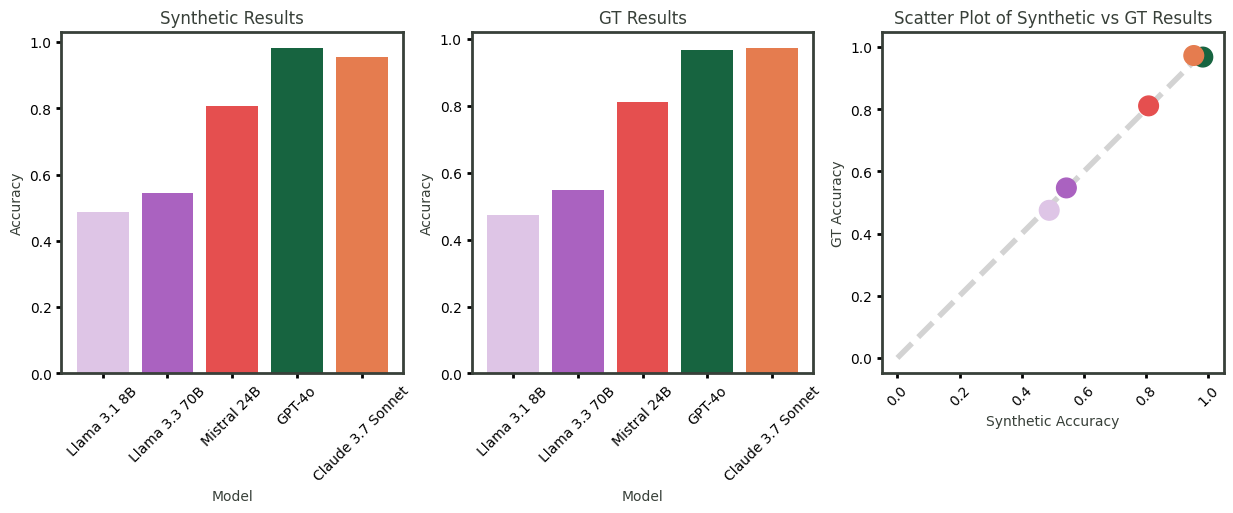

In [13]:
import matplotlib.pyplot as plt

synthetic_results = {
    "Llama 3.1 8B": 0.4883720930232558,
    "Llama 3.3 70B": 0.5436046511627907,
    "Mistral 24B": 0.8081395348837209,
    "GPT-4o": 0.9825581395348837,
    "Claude 3.7 Sonnet": 0.9534883720930233,
}
gt_results = {
    "Llama 3.1 8B": 0.475,
    "Llama 3.3 70B": 0.547,
    "Mistral 24B": 0.811,
    "GPT-4o": 0.968,
    "Claude 3.7 Sonnet": 0.973,
}

background_color = "#FFFFFF"
text_and_border_color = "#384039"
model_colors = {
    "Llama 3.1 8B": "#DEC5E6",
    "Llama 3.3 70B": "#AA62C0",
    "Mistral 24B": "#E54F4F",
    "GPT-4o": "#176440",
    "Claude 3.7 Sonnet": "#E57C4F",
}

# make a plot of 2 bar charts then a scatter plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.set_facecolor(background_color)

for i in range(3):
    axs[i].set_facecolor(background_color)
    axs[i].tick_params(axis="x", rotation=45, width=2)
    axs[i].tick_params(axis="y", width=2)
    axs[i].spines["top"].set_linewidth(2)
    axs[i].spines["right"].set_linewidth(2)
    axs[i].spines["bottom"].set_linewidth(2)
    axs[i].spines["left"].set_linewidth(2)
    axs[i].spines["top"].set_color(text_and_border_color)
    axs[i].spines["right"].set_color(text_and_border_color)
    axs[i].spines["bottom"].set_color(text_and_border_color)
    axs[i].spines["left"].set_color(text_and_border_color)

# plot the synthetic results
axs[0].bar(
    synthetic_results.keys(),
    synthetic_results.values(),
    color=list(model_colors.values()),
)
axs[0].set_box_aspect(1)
axs[0].set_title("Synthetic Results", color=text_and_border_color)
axs[0].set_xlabel("Model", color=text_and_border_color)
axs[0].set_ylabel("Accuracy", color=text_and_border_color)


# plot the gt results
axs[1].bar(gt_results.keys(), gt_results.values(), color=list(model_colors.values()))
axs[1].set_box_aspect(1)
axs[1].set_title("GT Results", color=text_and_border_color)
axs[1].set_xlabel("Model", color=text_and_border_color)
axs[1].set_ylabel("Accuracy", color=text_and_border_color)

# plot the scatter plot
axs[2].scatter(
    synthetic_results.values(),
    gt_results.values(),
    color=list(model_colors.values()),
    s=200,
)
axs[2].set_box_aspect(1)
axs[2].set_title("Scatter Plot of Synthetic vs GT Results", color=text_and_border_color)
axs[2].set_xlabel("Synthetic Accuracy", color=text_and_border_color)
axs[2].set_ylabel("GT Accuracy", color=text_and_border_color)
axs[2].plot([0, 1], [0, 1], color="lightgray", linewidth=4, linestyle="--", zorder=0)